# Production envelopes

Production envelopes (aka phenotype phase planes) will show distinct phases of optimal growth with different use of two different substrates. For more information, see [Edwards et al.](http://dx.doi.org/10.1002/bit.10047)

Cobrapy supports calculating these production envelopes and they can easily be plotted using your favorite plotting package. Here, we will make one for the "textbook" _E. coli_ core model and demonstrate plotting using [matplotlib](http://matplotlib.org/).

In [1]:
from cobra.io import load_model
from cobra.flux_analysis import production_envelope

model = load_model("textbook")

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


We want to make a phenotype phase plane to evaluate uptakes of Glucose and Oxygen.

In [2]:
prod_env = production_envelope(model, ["EX_glc__D_e", "EX_o2_e"])

In [3]:
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.000000,5.692701e-14,NaN,-10.0,-60.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.072244,1.310050e+00,NaN,-10.0,-56.842105
2,EX_glc__D_e,0.0,0.0,NaN,0.144488,2.620100e+00,NaN,-10.0,-53.684211
3,EX_glc__D_e,0.0,0.0,NaN,0.216732,3.930150e+00,NaN,-10.0,-50.526316
4,EX_glc__D_e,0.0,0.0,NaN,0.288975,5.240200e+00,NaN,-10.0,-47.368421


If we specify the carbon source, we can also get the carbon and mass yield. For example, temporarily setting the objective to produce acetate instead we could get production envelope as follows and pandas to quickly plot the results.

In [4]:
prod_env = production_envelope(
    model, ["EX_o2_e"], objective="EX_ac_e", carbon_sources="EX_glc__D_e")

In [5]:
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,0.0,0.000000,0.000000,0.000000,-60.000000
1,EX_glc__D_e,0.0,0.0,0.0,1.578947,0.052632,0.051748,-56.842105
2,EX_glc__D_e,0.0,0.0,0.0,3.157895,0.105263,0.103496,-53.684211
3,EX_glc__D_e,0.0,0.0,0.0,4.736842,0.157895,0.155245,-50.526316
4,EX_glc__D_e,0.0,0.0,0.0,6.315789,0.210526,0.206993,-47.368421


In [6]:
%matplotlib inline

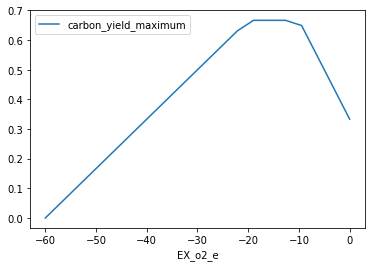

In [7]:
prod_env.plot(
    kind='line', x='EX_o2_e', y='carbon_yield_maximum');

Previous versions of cobrapy included more tailored plots for phase planes which have now been dropped in order to improve maintainability and enhance the focus of cobrapy. Plotting for cobra models is intended for another package.